# Exercise 4.9

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CoinflipMDP():
	
	def __init__(self, winning_state, head_probability):
		self.winning_state = winning_state
		self.head_probability = head_probability	
						

	def getPossibleActions(self, state):
		max = min(self.winning_state - state, state)
		return list(range(1, max + 1))


	def getNonTerminalStates(self):
		return list(range(1, self.winning_state))
	
	def getTerminalStatesAndValues(self):
		return [(0,0), (self.winning_state, 1)]

	
	def getTransitionStatesAndProbs(self, state, action):
		return [(state - action, 1 - self.head_probability), (state + action, self.head_probability)]

	def getReward(self, state, action, next_state):
		return 0

In [3]:
class ValueIterationAgent():

	def __init__(self, mdp, discount = 0.9, theta = 0.000001):
		self.mdp = mdp
		self.discount = discount
		self.theta = theta

		non_terminal_states = self.mdp.getNonTerminalStates()
		terminal_states_values = self.mdp.getTerminalStatesAndValues()
		self.state_values = {}
		for s in non_terminal_states:
			self.state_values[s] = 0
		for s, v in terminal_states_values:
			self.state_values[s] = v
		
		delta = float('inf')
		while(self.theta < delta):
			delta = 0
			for s in non_terminal_states:
				v = self.state_values[s]
				possible_actions = self.mdp.getPossibleActions(s)

				for a in possible_actions:
					q = self.getQValue(s, a)
					if  q > self.state_values[s]:
						self.state_values[s] = q
				delta = max(delta, abs(v - self.state_values[s]))



	def getQValue(self, state, action):
		next_state_probs = self.mdp.getTransitionStatesAndProbs(state, action)
		q = 0
		for next_state, prob in next_state_probs:
			reward = self.mdp.getReward(state, action, next_state)
			q += prob * (reward + self.discount * self.state_values[next_state])
		return q



	def getPolicy(self, state):
		possible_actions = self.mdp.getPossibleActions(state)
		best_action = None
		best_q_value = float('-inf')

		for a in possible_actions:
			q = self.getQValue(state, a)
			if q > best_q_value + 0.0000001:	#Because of numerical errors
				best_action = a
				best_q_value = q
		
		return best_action
				



In [4]:
def plot_results(mdp, agent, save_string_values=None, save_string_policy=None):
    values = np.zeros(mdp.winning_state + 1)
    policies = np.zeros(mdp.winning_state + 1)
    for i in range(mdp.winning_state + 1):
        values[i] = agent.state_values[i]
        policies[i] = agent.getPolicy(i)

    plt.figure(figsize=(10, 5))
    plt.title(f"$p_h={mdp.head_probability}$")
    plt.xlabel("Capital")
    plt.ylabel("Value estimates")
    plt.bar(range(len(values)), values, width=0.7, align='center')
    plt.tight_layout()
    if save_string_values:
        plt.savefig(f'../chapters_latex/figures/ex_04_09_values_{save_string_values}.pdf')
    
    plt.figure(figsize=(10, 5))
    plt.title(f"$p_h={mdp.head_probability}$")
    plt.xlabel("Capital")
    plt.ylabel("Final Policy (stake)")

    plt.bar(range(len(policies)), policies, width=0.7, align='center')
    if save_string_policy:
        plt.savefig(f'../chapters_latex/figures/ex_04_09_policies_{save_string_values}.pdf')
    
    plt.show()
    

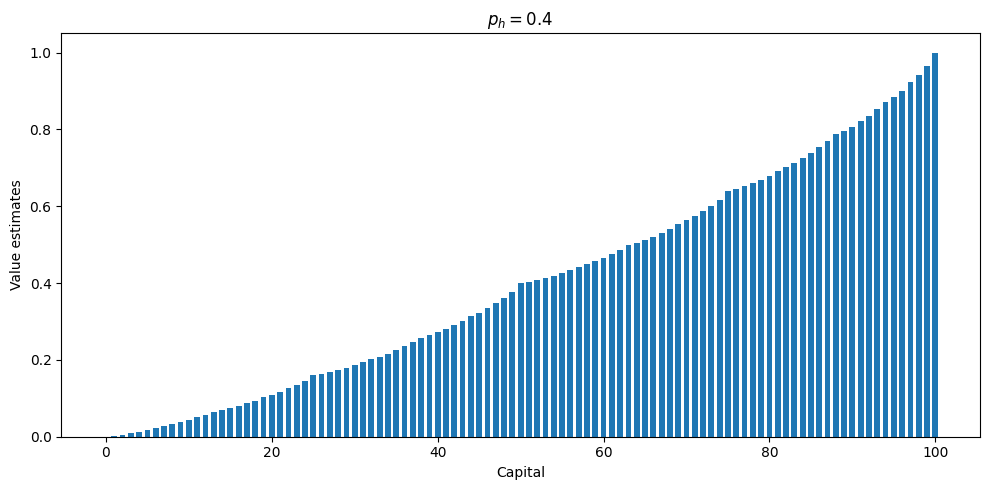

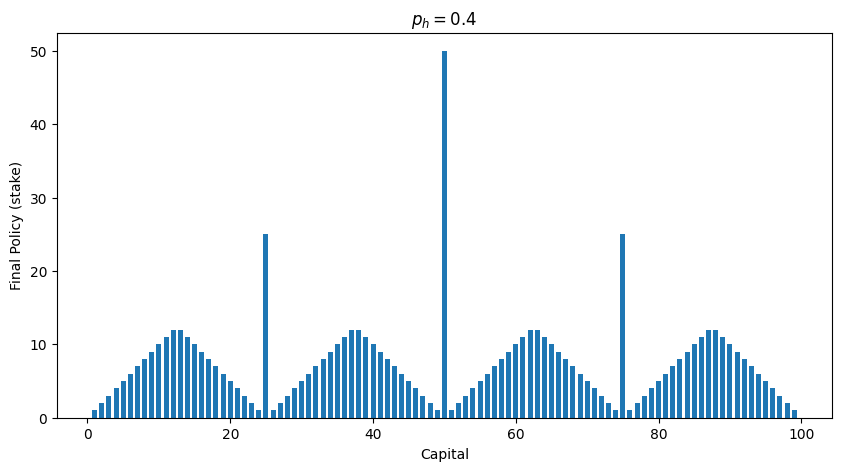

In [5]:
mdp = CoinflipMDP(100, 0.4)
agent = ValueIterationAgent(mdp, 1)
plot_results(mdp,agent, save_string_values="04", save_string_policy="04")


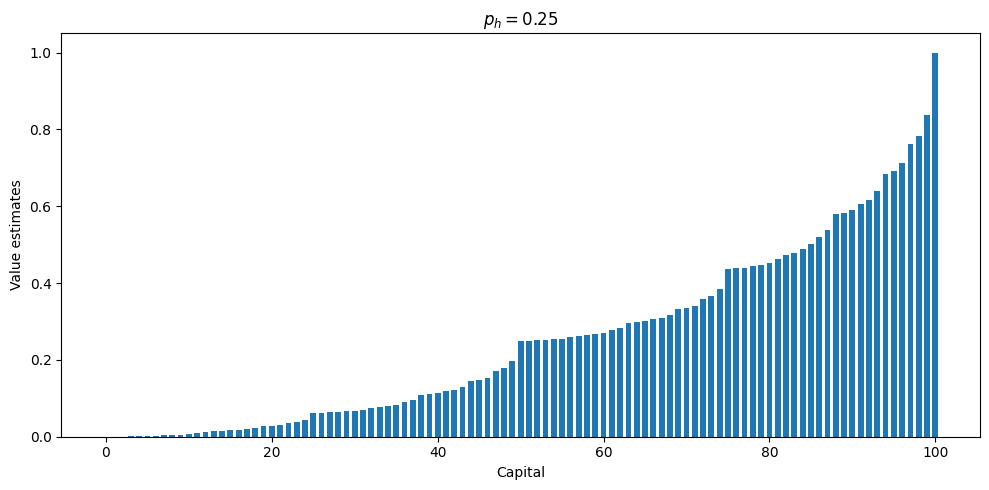

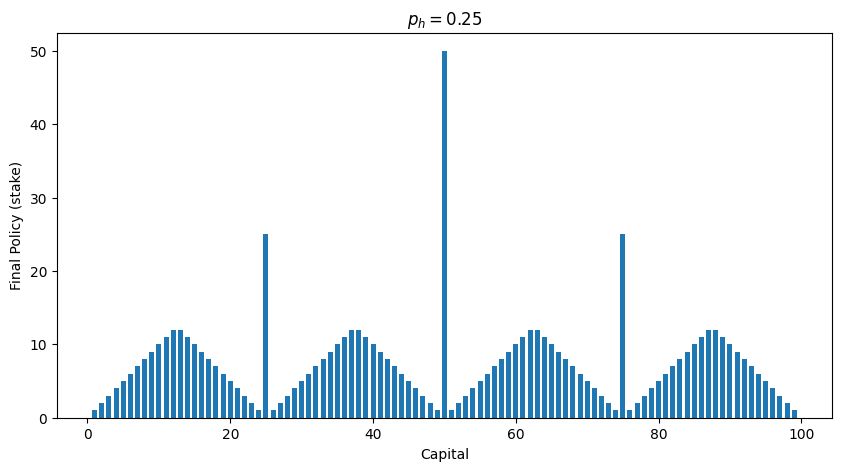

In [6]:
mdp = CoinflipMDP(100, 0.25)
agent = ValueIterationAgent(mdp, 1)
plot_results(mdp,agent, save_string_values="025", save_string_policy="025")

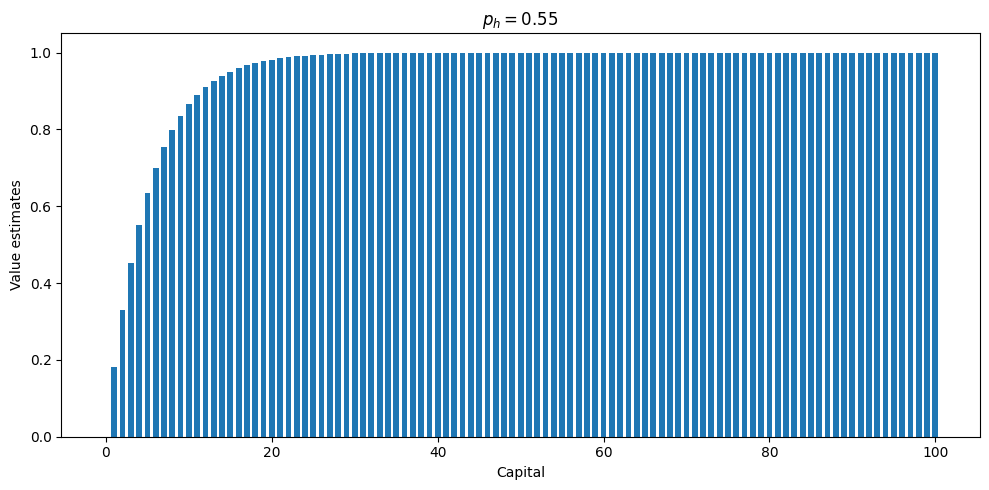

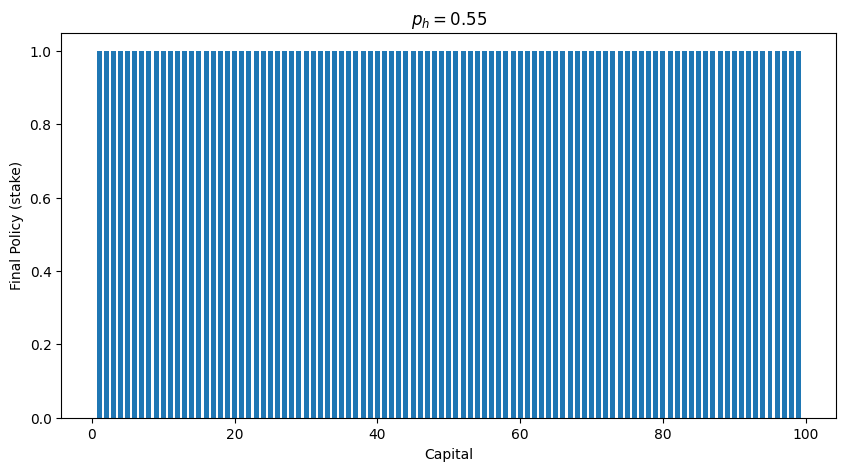

In [7]:
mdp = CoinflipMDP(100, 0.55)
agent = ValueIterationAgent(mdp, 1)
plot_results(mdp,agent, save_string_values="055", save_string_policy="055")

## Stability:

theta = 1.0


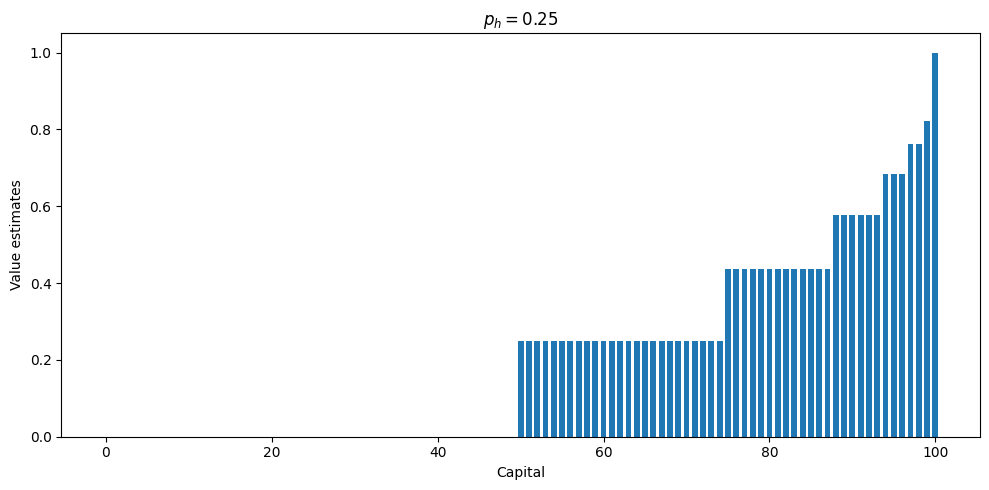

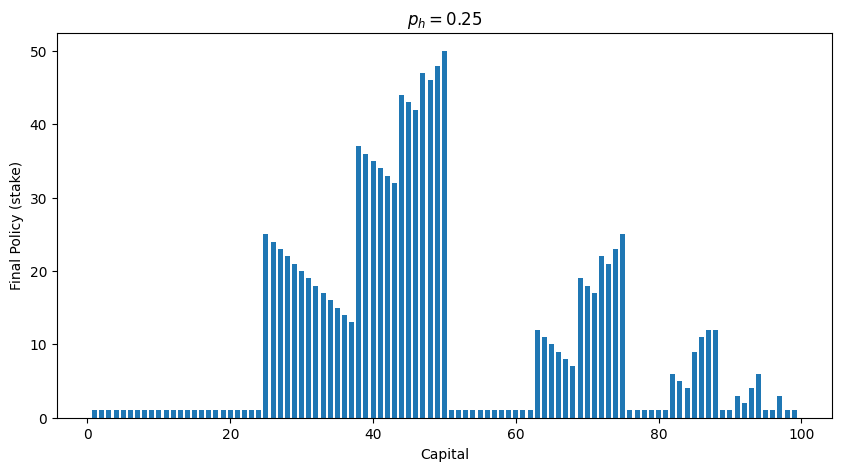

theta = 0.1


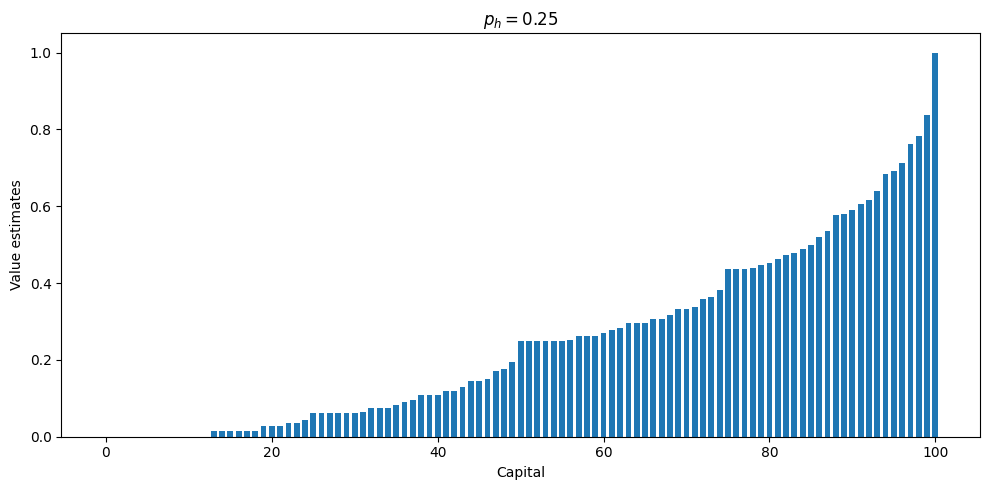

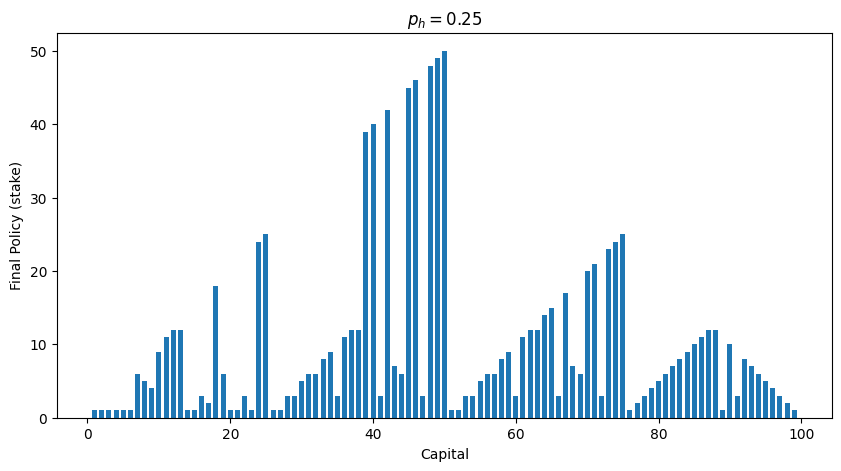

theta = 0.010000000000000002


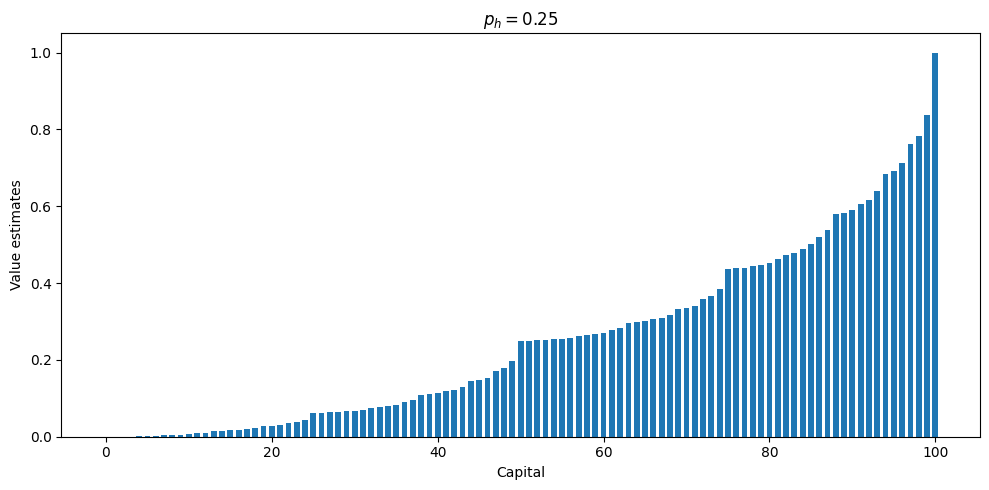

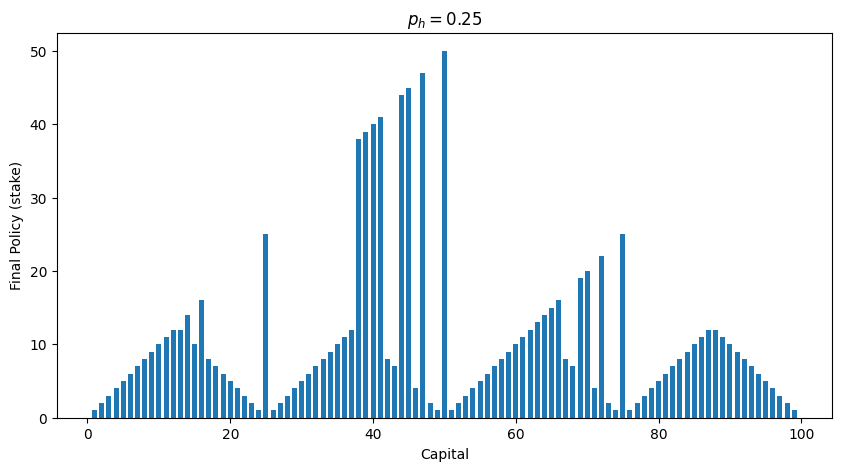

theta = 0.0010000000000000002


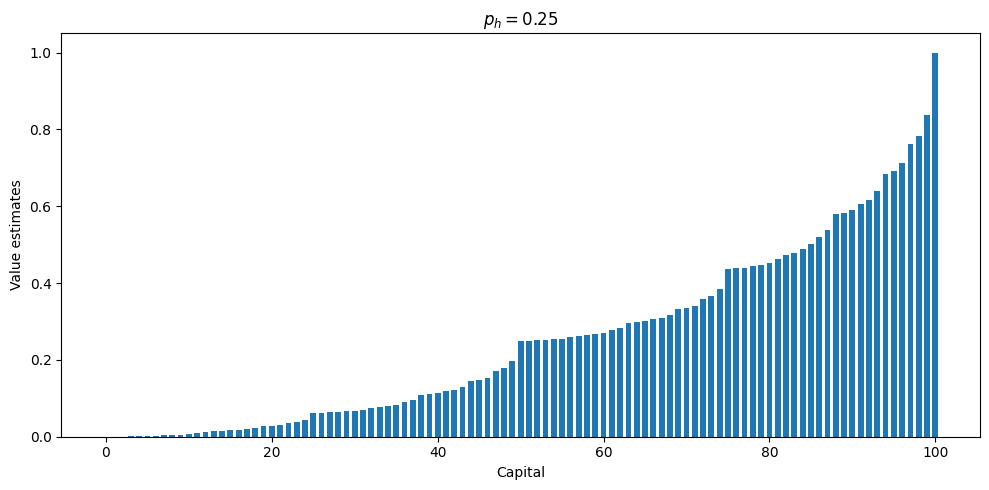

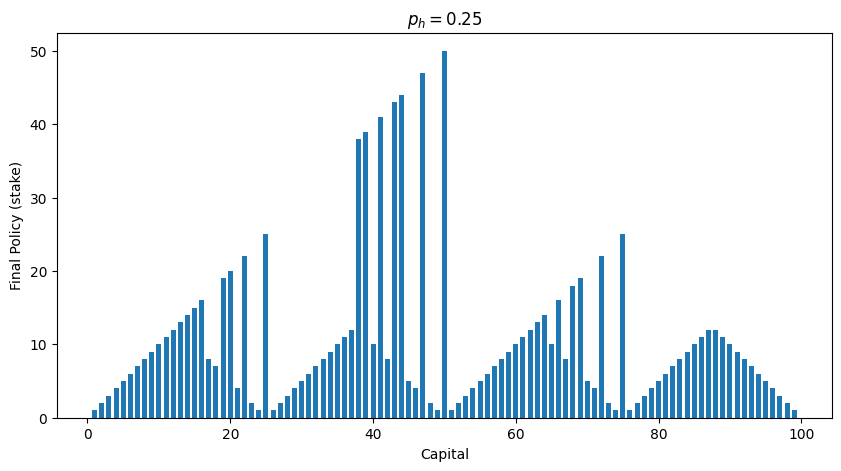

theta = 0.00010000000000000002


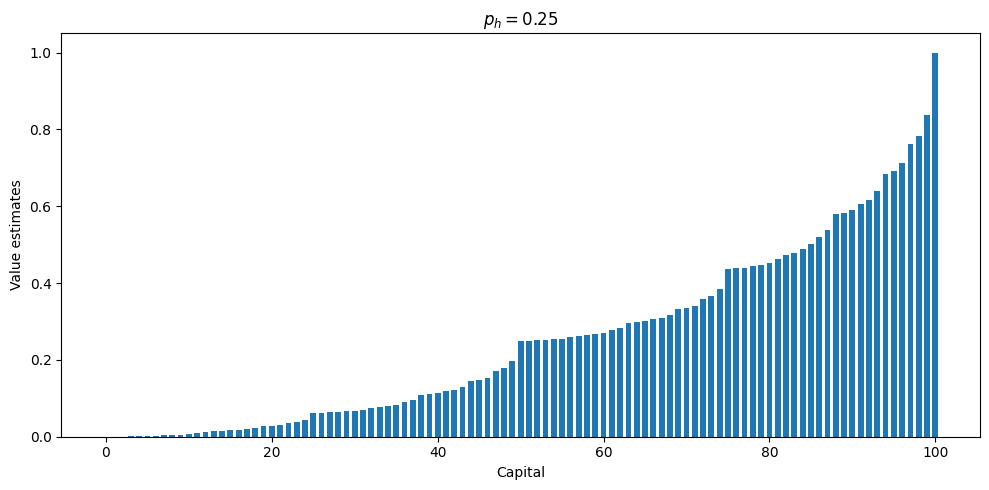

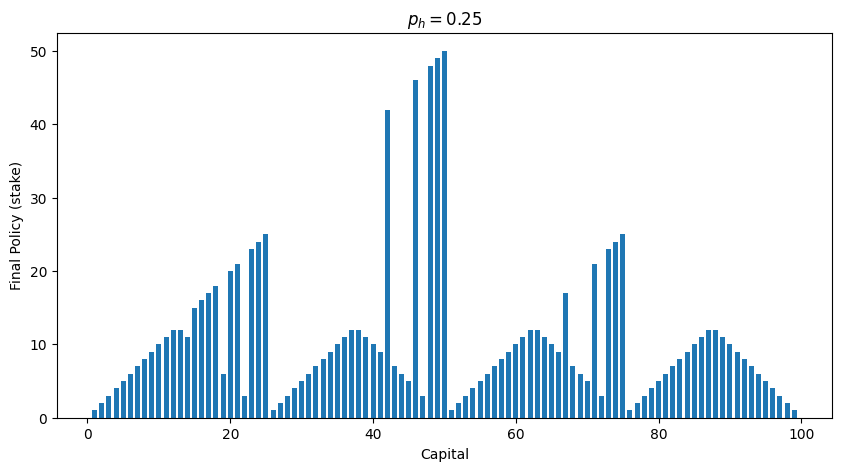

theta = 1.0000000000000003e-05


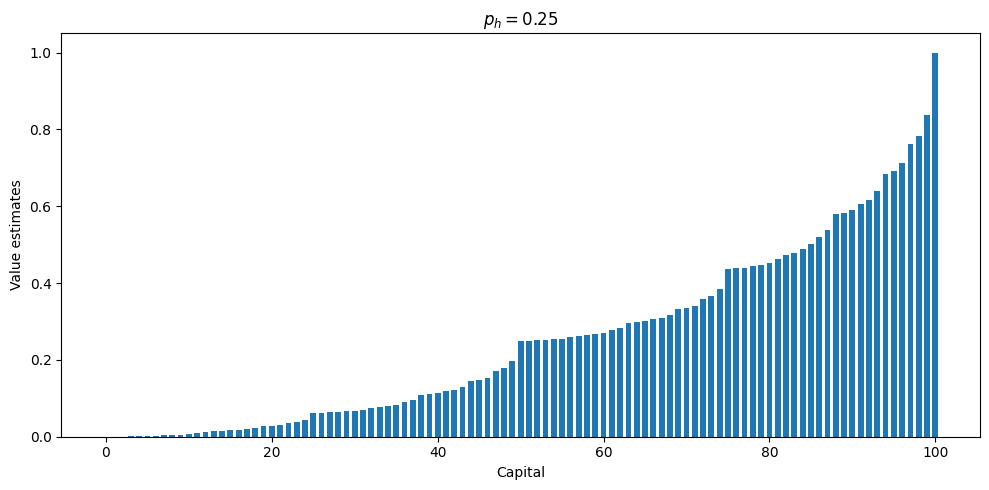

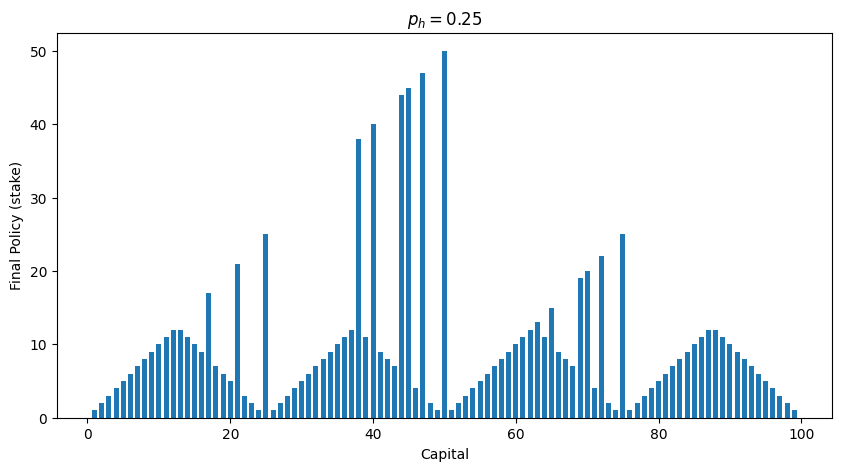

theta = 1.0000000000000004e-06


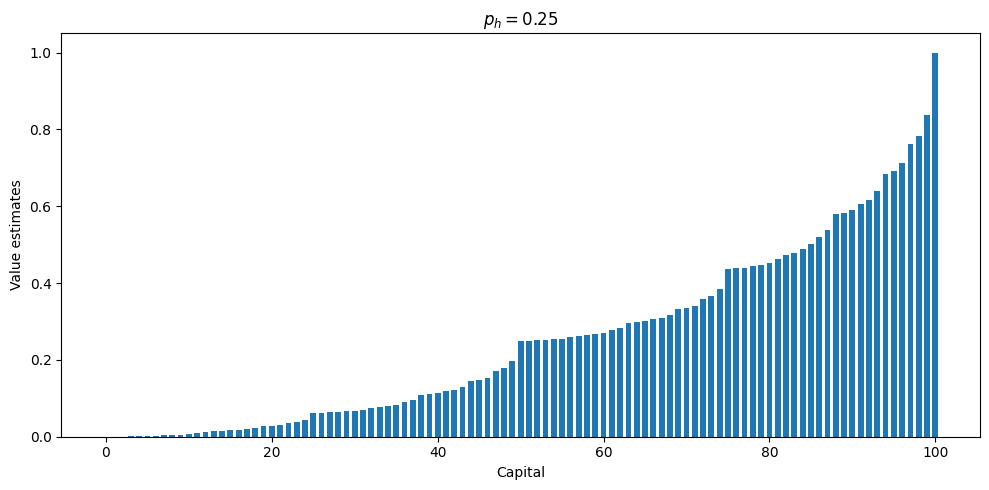

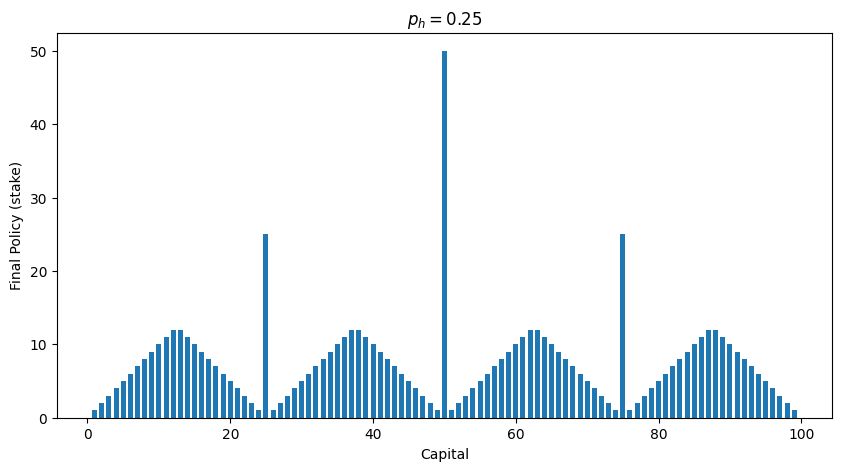

theta = 1.0000000000000004e-07


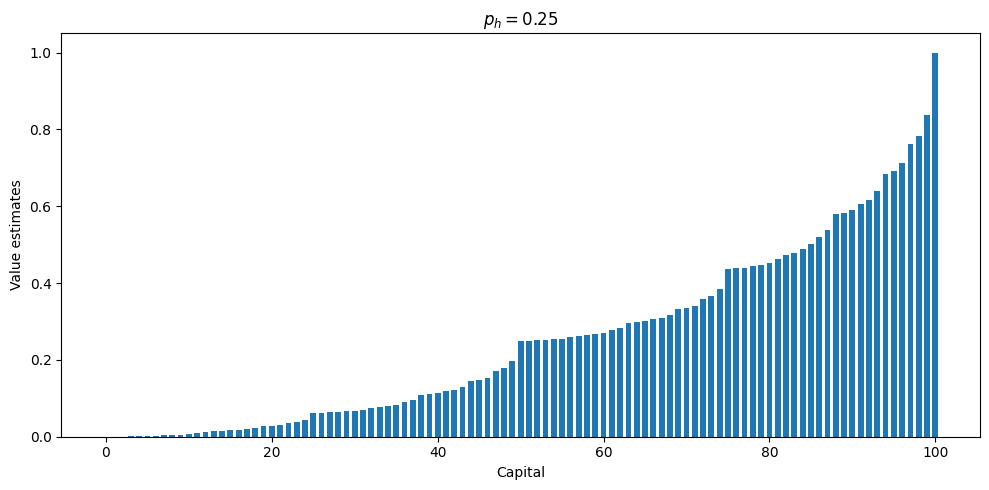

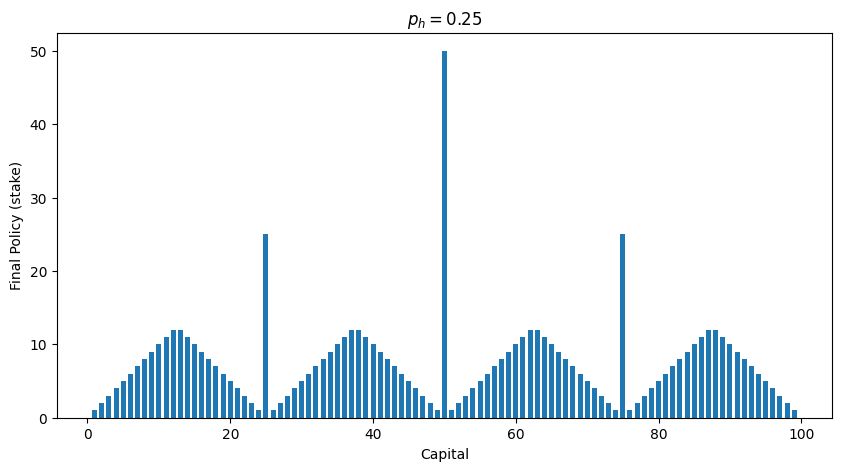

theta = 1.0000000000000005e-08


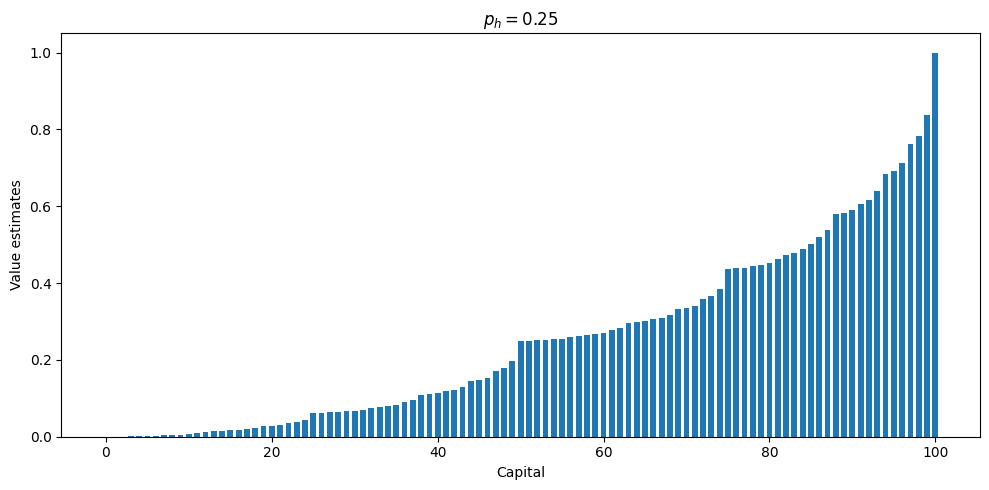

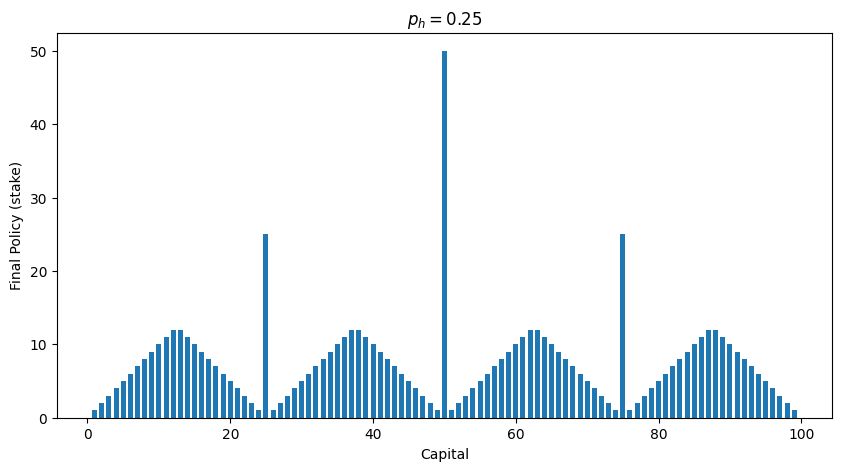

theta = 1.0000000000000005e-09


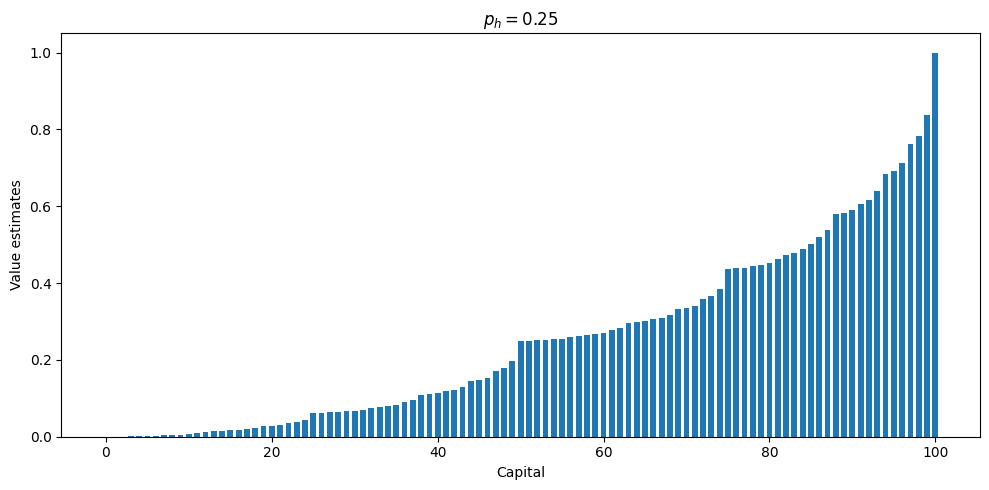

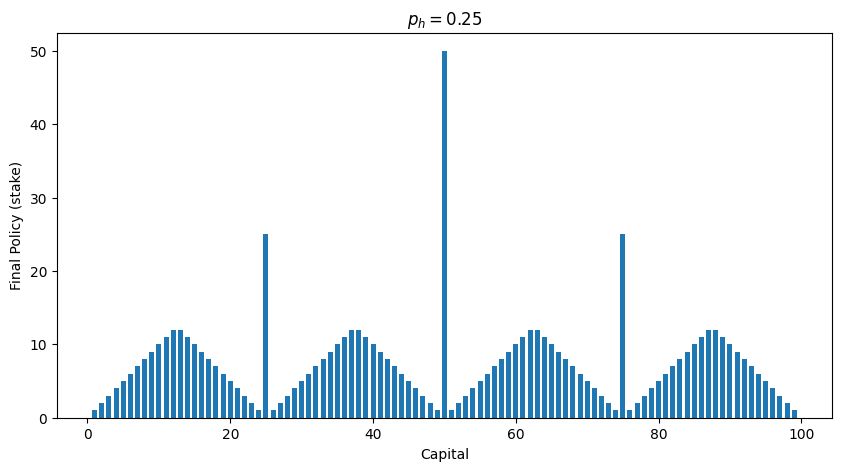

In [8]:
mdp = CoinflipMDP(100, 0.25)
for theta in [0.1 ** x for x in range(10)]:
    agent = ValueIterationAgent(mdp, 1, theta = theta)
    print(f"theta = {theta}")
    plot_results(mdp,agent)

The results are stable as $\theta \rightarrow 0$